# Basic Network Metrics with NetworkX

This reference sheet includes some basic NetworkX functions, for understanding paths, directedness, and components. It uses the [Marvel network](https://github.com/melaniewalsh/sample-social-network-datasets/tree/master/sample-datasets/marvel) data as an example.

## Importing a Graph object

In [1]:
# Import NetworkX and key data science libraries
import networkx as nx
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme()

We already explored some methods for importing network data in a previous class, but sometimes importing data as a CSV can be tricky. In these cases, it's often easier to use pandas to import the data, and then convert from there:

(There's plenty of information on [Pandas](https://pandas.pydata.org/docs/user_guide/index.html) and [Seaborn](https://seaborn.pydata.org/tutorial.html) available in their documentation, too!)

In [2]:
marvel_pd = pd.read_csv("marvel-unimodal-edges.csv")
marvel = nx.from_pandas_edgelist(marvel_pd, source="Source", target="Target", edge_attr=True)
print(marvel)

FileNotFoundError: [Errno 2] No such file or directory: 'marvel-unimodal-edges.csv'

## The Basics

In [3]:
len(marvel.nodes) # Number of nodes

327

In [4]:
len(marvel.edges) # Number of edges

9891

In [5]:
marvel.number_of_edges() # Alternative method for number of edges

9891

In [6]:
marvel.is_directed() # Is the graph directed?

False

## Paths

In [7]:
nx.shortest_path(marvel, "Black Panther / T'chal", 	"Gambit / Remy Lebeau") # Shortest path as list

["Black Panther / T'chal", 'Firestar / Angelica Jo', 'Gambit / Remy Lebeau']

In [8]:
nx.shortest_path_length(marvel, "Black Panther / T'chal", "Gambit / Remy Lebeau") #Shortest path length (Distance)

2

In [9]:
nx.average_shortest_path_length(marvel) # Average shortest path length (Average distance)

1.873004258831917

In [10]:
nx.diameter(marvel)

3

# Components

In [11]:
nx.is_connected(marvel) # Is the graph connected?

True

In [12]:
nx.number_connected_components(marvel) # How many components are there?

1

In [13]:
# Find the largest connected component (as a node set)
components = [G for G in nx.connected_components(marvel)]
largest = max(components, key=len)

## Centrality

Below I show just one example, but there are a range of [centrality functions](https://networkx.org/documentation/stable/reference/algorithms/centrality.html) in NetworkX.

In [14]:
# Calculate betweenness centrality for every node
bc = nx.betweenness_centrality(marvel)

In [15]:
# Add a node attribute from a centrality measure
nx.set_node_attributes(marvel,bc,"betweenness")

In [16]:
# Create a dataframe of nodes
nodes = pd.DataFrame.from_dict(marvel.nodes, orient='index')
nodes.reset_index(level=0,names="character",inplace=True)
nodes

,character,betweenness
0,Absorbing Man / Carl C,0.000607
1,Angel / Warren Kenneth,0.012523
2,Ant-man / Dr. Henry J.,0.010304
3,Ant-man Ii / Scott Har,0.000426
4,Apocalypse / En Sabah,0.000777
...,...,...
322,Wrecker Iii / Dirk Gar,0.000659
323,X-man / Nathan Grey,0.000116
324,Zabu,0.000098
325,Zero,0.000033


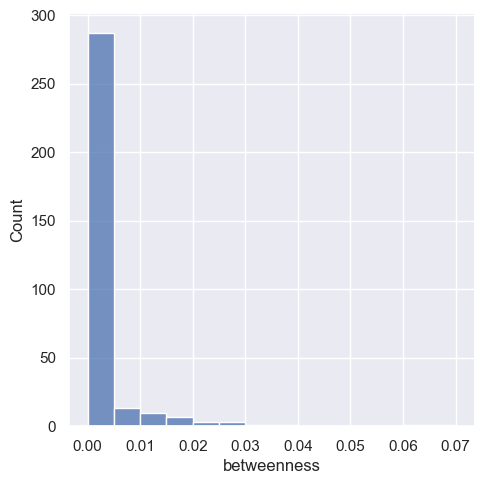

In [17]:
# See the distribution for a metric
sns.displot(x="betweenness", binwidth=.005, data=nodes)

## Triangles and Clustering

In [30]:
# Get number of triangles for every node
nx.triangles(marvel)

# n.b. Pay attention to the following note from the NetworkX docs:
# When computing triangles for the entire graph each triangle is counted three times, once at each node.

{"Black Panther / T'chal": 2837,
 'Loki [asgardian]': 1055,
 'Mantis / ? Brandt': 277,
 'Iceman / Robert Bobby': 5320,
 'Marvel Girl / Jean Grey': 5050,
 'Cyclops / Scott Summer': 6474,
 'Klaw / Ulysses Klaw': 1012,
 'Human Torch / Johnny S': 6282,
 'Richards, Franklin B': 2444,
 'Wolverine / Logan': 7168,
 'Firebird / Bonita Juar': 643,
 'Mr. Fantastic / Reed R': 6191,
 'Medusa / Medusalith Am': 1019,
 'Dr. Strange / Stephen': 4522,
 'Jack Of Hearts / Jack': 576,
 'Mephisto': 916,
 'Thanos': 2337,
 'Swordsman / Jacques Du': 342,
 'Collector / Taneleer T': 393,
 'Lockjaw [inhuman]': 865,
 'Sub-mariner / Namor Ma': 4197,
 'Pharaoh Rama-tut': 2562,
 'Ant-man Ii / Scott Har': 917,
 'Lyja Lazerfist [skru': 399,
 'Gorgon [inhuman]': 837,
 'Nighthawk Ii / Kyle Ri': 422,
 'Cage, Luke / Carl Luca': 1200,
 'Colossus Ii / Peter Ra': 6169,
 'Hellcat / Patsy Walker': 1278,
 'Karnak [inhuman]': 873,
 'Death': 756,
 'Redwing': 214,
 'Daredevil / Matt Murdo': 4276,
 'Norriss, Sister Barb': 1244,
 'Ra

In [20]:
# Get clustering coefficients
# These can be added to a node dataframe as above
nx.clustering(marvel)

{"Black Panther / T'chal": 0.5617821782178218,
 'Loki [asgardian]': 0.5579058699101005,
 'Mantis / ? Brandt': 0.9233333333333333,
 'Iceman / Robert Bobby': 0.40794417606011807,
 'Marvel Girl / Jean Grey': 0.42312526183493926,
 'Cyclops / Scott Summer': 0.3353361649228219,
 'Klaw / Ulysses Klaw': 0.7071977638015374,
 'Human Torch / Johnny S': 0.3390544041450777,
 'Richards, Franklin B': 0.5838509316770186,
 'Wolverine / Logan': 0.2975508509755085,
 'Firebird / Bonita Juar': 0.914651493598862,
 'Mr. Fantastic / Reed R': 0.3174383428190535,
 'Medusa / Medusalith Am': 0.8318367346938775,
 'Dr. Strange / Stephen': 0.4581560283687943,
 'Jack Of Hearts / Jack': 0.7773279352226721,
 'Mephisto': 0.5948051948051948,
 'Thanos': 0.7782217782217782,
 'Swordsman / Jacques Du': 0.9047619047619048,
 'Collector / Taneleer T': 0.903448275862069,
 'Lockjaw [inhuman]': 0.8737373737373737,
 'Sub-mariner / Namor Ma': 0.41337535703732886,
 'Pharaoh Rama-tut': 0.7176470588235294,
 'Ant-man Ii / Scott Har': 0.

In [21]:
# Find the average clustering coefficient
nx.average_clustering(marvel)

0.7047201786696375

## Bridges

In [23]:
# List a network's bridges
list(nx.bridges(marvel))

[]

In [25]:
# Test if a network has any bridges
nx.has_bridges(marvel)

False

In [27]:
# List a network's local bridges
list(nx.local_bridges(marvel))

[('Death', 'Deadpool / Jack / Wade W', 3)]

## Neigbors

In [29]:
# Find a nodes neighbors
list(nx.neighbors(marvel, 'Death'))

["Black Panther / T'chal",
 'Iron Man / Tony Stark',
 'Sub-mariner / Namor Ma',
 'Nova / Richard Rider',
 'Hulk / Dr. Robert Bruce Banner',
 'Spider-man / Peter Parker',
 'Wasp / Janet Van Dyne',
 'Galactus / Galan',
 'Silver Surfer / Norrin',
 'Hawk',
 'Scarlet Witch / Wanda',
 'Uatu',
 'Captain America',
 'Thunderstrike / Eric K',
 'Wonder Man / Simon Wil',
 'Wolverine / Logan',
 'She-hulk / Jennifer Wa',
 'Vision',
 'Storm / Ororo Munroe S',
 'Eternity / Adam Qadmon',
 'Quasar Iii / Wendell V',
 'Black Widow / Natasha',
 'Firelord / Pyreus Kril',
 'Thor / Dr. Donald Blak',
 'Richards, Franklin B',
 'Deadpool / Jack / Wade W',
 'Mephisto',
 'Dr. Doom / Victor Von',
 'Thing / Benjamin J. Gr',
 'Gamora',
 'Drax / Arthur Douglas',
 'Nova Ii / Frankie Raye',
 'Ant-man / Dr. Henry J.',
 'Moondragon / Heather D',
 'Pip / Prince Gofern',
 'Thanos',
 'Collector / Taneleer T',
 'Captain Marvel / Capta',
 'Warlock Ii / Adam Warl',
 'Dr. Strange / Stephen',
 'Starfox / Eros',
 'Invisible Woman 

In [32]:
# Find common neighbors of a node pair
list(nx.common_neighbors(marvel, 'Death', 'Zeus'))

['Sub-mariner / Namor Ma',
 'Wasp / Janet Van Dyne',
 'Hawk',
 'Scarlet Witch / Wanda',
 'Captain America',
 'She-hulk / Jennifer Wa',
 'Vision',
 'Black Widow / Natasha',
 'Thor / Dr. Donald Blak',
 'Ant-man / Dr. Henry J.']